In [176]:
from datetime import date, datetime, time, timedelta
import pysrt
from textblob import TextBlob
import matplotlib 
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(16.0,9.0)
style.use('fivethirtyeight')
from decimal import *
import csv
import pandas as pd
import numpy as np

In [5]:
file=open('/people/berhe/Bureau/Project/TLP_thesis/Scenes/groundtruth.seg','r')
text=file.readlines()
line=text[1]
print line
spl=line.split()
print spl

6445 106809

['6445', '106809']


In [82]:
for line in text:
    print line

0 6445

6445 106809

106809 212527 1

212527 292127 1

292127 389609 0 3

389609 522490 0 3

522490 668490 0

668490 770727 2 3

770727 907972 2 3

907972 1.12688e+06 0 3

1.12688e+06 1.172e+06 2

1.172e+06 1.27553e+06 2 3

1.27553e+06 1.47484e+06 3

1.47484e+06 1.52084e+06 1

1.52084e+06 1.72096e+06 2

1.72096e+06 1.91261e+06 0

1.91261e+06 2.02528e+06 1

2.02528e+06 2.05756e+06 2

2.05756e+06 2.13596e+06 0

2.13596e+06 2.24564e+06 0

2.24564e+06 2.29792e+06 0

2.29792e+06 2.40116e+06 1

2.40116e+06 2.5308e+06 1

2.5308e+06 2.64248e+06 3

2.64248e+06 2.805e+06 3

2.805e+06 2.85644e+06 3

2.85644e+06 2.8946e+06 3

2.8946e+06 3.14312e+06 3

3.14312e+06 3.17416e+06 3

3.17416e+06 3.24932e+06 3

3.24932e+06 3.31565e+06



In [6]:
file_sub='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'
subs=pysrt.open(file_sub,encoding='iso-8859-1')
#scence_scv=pd.read_csv('/people/berhe/Bureau/Project/TLP_thesis/Scenes/groundtruth.seg',header=None,sep=" ")

In [7]:
def create_intervals(start, end, delta):
    current=start
    while current<=end:
        current=(datetime.combine(date.today(),current)+delta).time()
        yield current

In [8]:
def subtitle_extraction(file='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'):
    subs=pysrt.open(file,encoding='iso-8859-1')
    n=len(subs)
    intervals=[]
    start=time(0,0,0)
    end=subs[-1].end.to_time()
    delta=timedelta(minutes=delta)
    for results in create_intervals(start, end, delta):
        intervals.append(results)
    index=0
    m=len(intervals)
    for i in range(m):
        text=""
        for j in range(index,n):
            if subs[j].end.to_time()<intervals[i]:
                text+=subs[j].text_without_tags + " "
            else:
                break
        blob=TextBlob(text)
        pol=blob.sentiment.polarity
    
    

In [9]:
def scene_extraction(file=open('/people/berhe/Bureau/Project/TLP_thesis/Scenes/groundtruth.seg','r')):
    text=file.readlines()
    start_scene=[]
    end_scene=[]
    story_id=[]
    for text_line in text:
        if not text_line in ['\n', '\r\n']:
            splitte_lines=text_line.split()
            try:
                start_scene.append(splitte_lines[0])
                end_scene.append(splitte_lines[1])
                story_id.append(splitte_lines[2])
            except IndexError:
                story_id.append('NA')
        else:
            continue
    return start_scene,end_scene,story_id

In [10]:
x,y,z=scene_extraction()

In [22]:
csv_obj=pd.DataFrame(columns=('start_time','end_time','story_id'))

In [23]:
csv_obj.start_time=x
csv_obj.end_time=y
csv_obj.story_id=z

In [24]:
csv_obj

,start_time,end_time,story_id
0,0,6445,NA
1,6445,106809,NA
2,106809,212527,1
3,212527,292127,1
4,292127,389609,0
5,389609,522490,0
6,522490,668490,0
7,668490,770727,2
8,770727,907972,2
9,907972,1.12688e+06,0


In [28]:
df=csv_obj

In [29]:
#df.story_id=[float(i) for i in csv_obj.start_time]
df.start_time=[float(i) for i in df.start_time]
df.end_time=[float(i) for i in csv_obj.end_time]

In [19]:
df.story_id=csv_obj.story_id

In [131]:
df

,start_time,end_time,story_id
0,0.0,6445.0,NA
1,6445.0,106809.0,NA
2,106809.0,212527.0,1
3,212527.0,292127.0,1
4,292127.0,389609.0,0
5,389609.0,522490.0,0
6,522490.0,668490.0,0
7,668490.0,770727.0,2
8,770727.0,907972.0,2
9,907972.0,1126880.0,0


In [48]:
df.sort_values(['start_time'],ascending=True)

,start_time,end_time,story_id
0,0.0,6445.0,NA
1,6445.0,106809.0,NA
2,106809.0,212527.0,1
3,212527.0,292127.0,1
4,292127.0,389609.0,0
5,389609.0,522490.0,0
6,522490.0,668490.0,0
7,668490.0,770727.0,2
8,770727.0,907972.0,2
9,907972.0,1126880.0,0


In [53]:
x3

['NA', '1', '0', '2', '0', '2', '3', '1', '2', '0', '1', '2', '0', '1', '3']

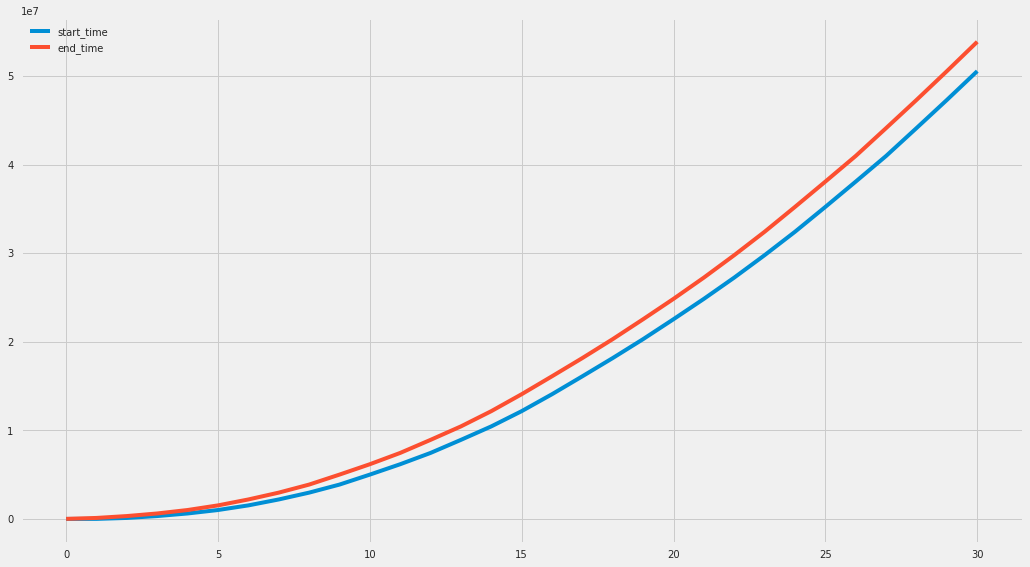

In [119]:
df=df.cumsum()
plt.figure();df.plot();

story_id
0     [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
1     [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
2     [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
3     [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
NA    [[AxesSubplot(0.08,0.07;0.378261x0.81), AxesSu...
dtype: object

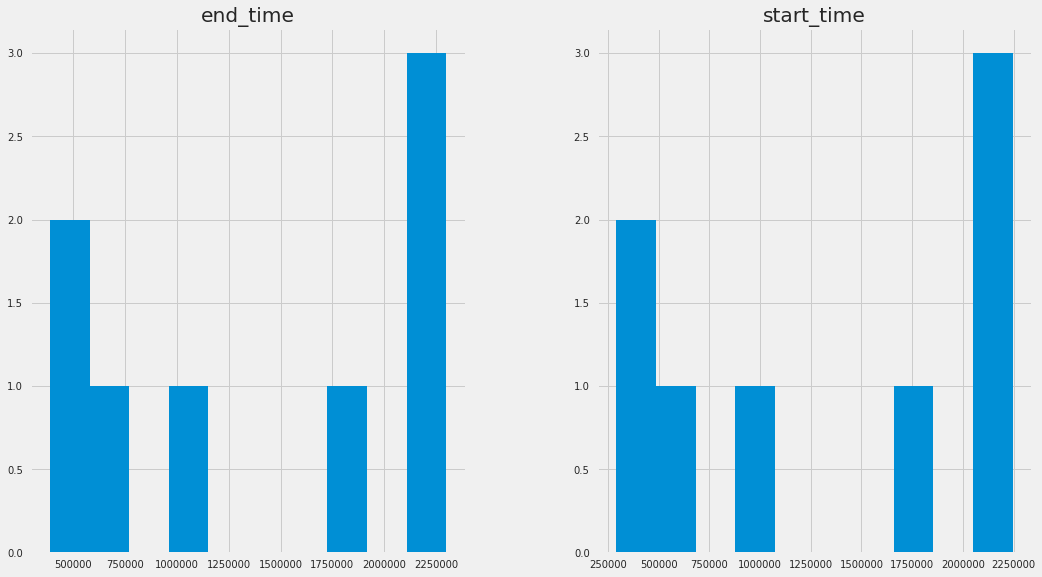

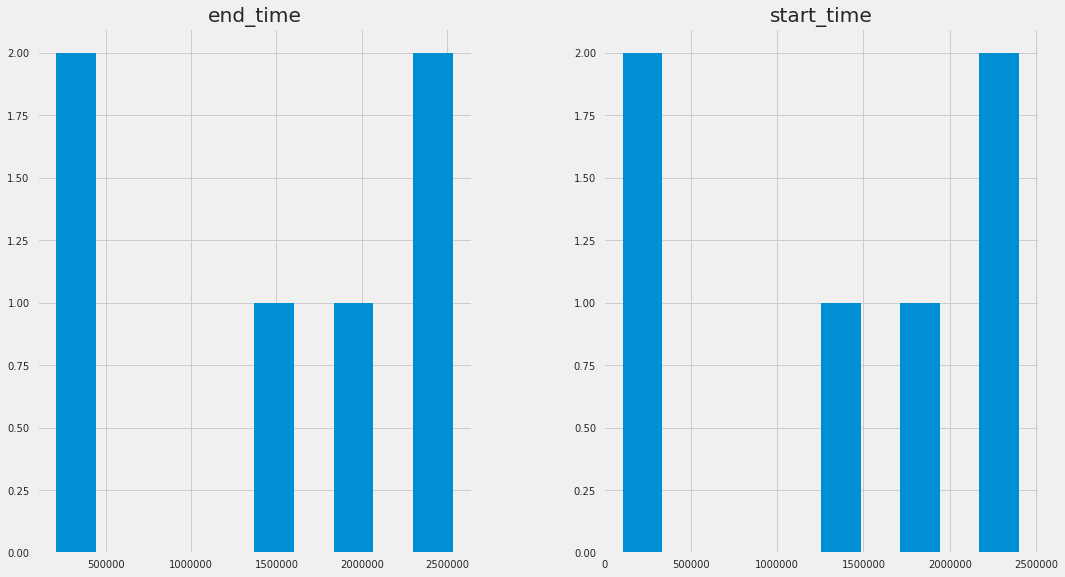

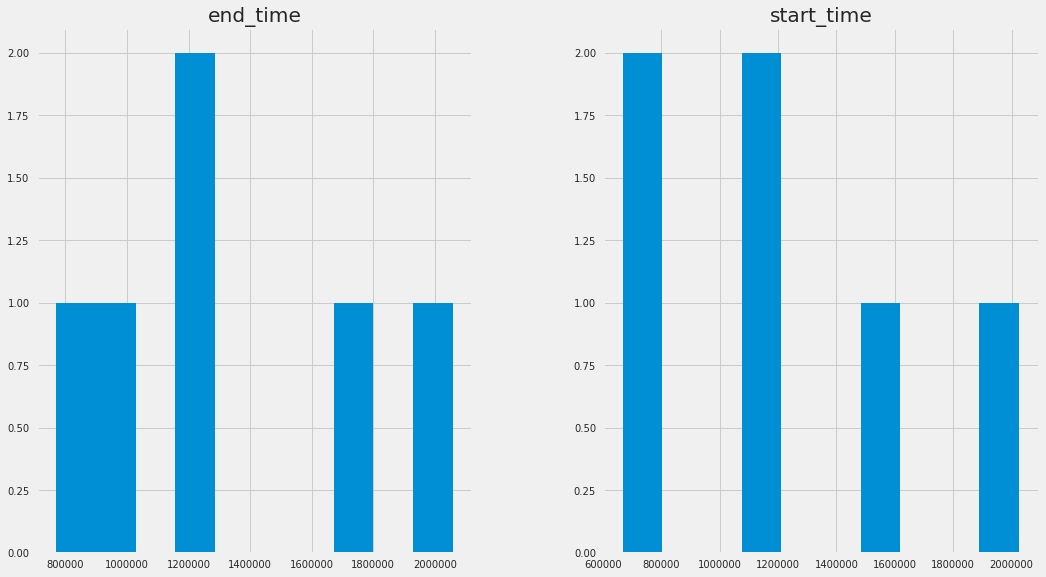

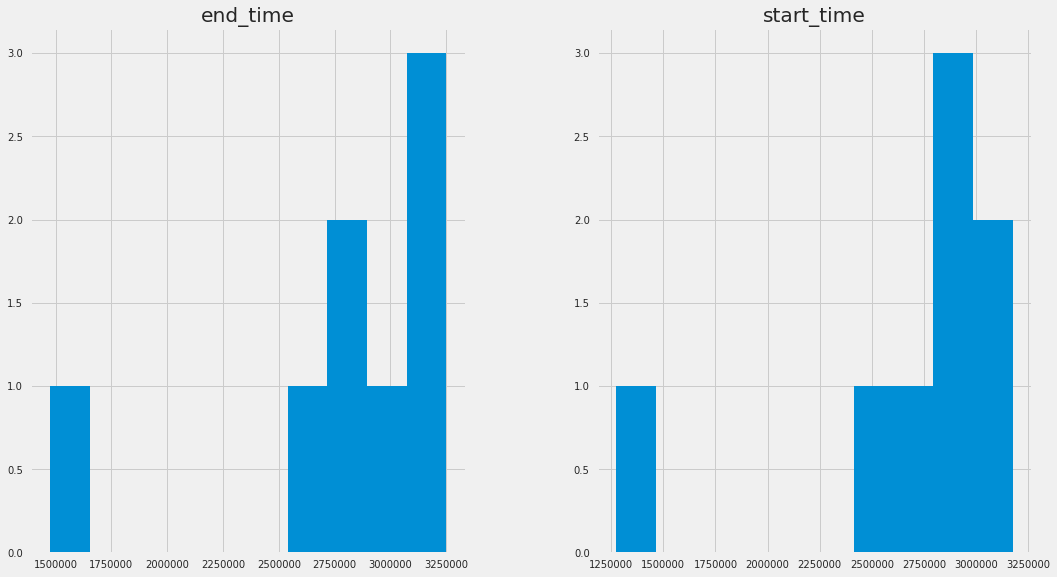

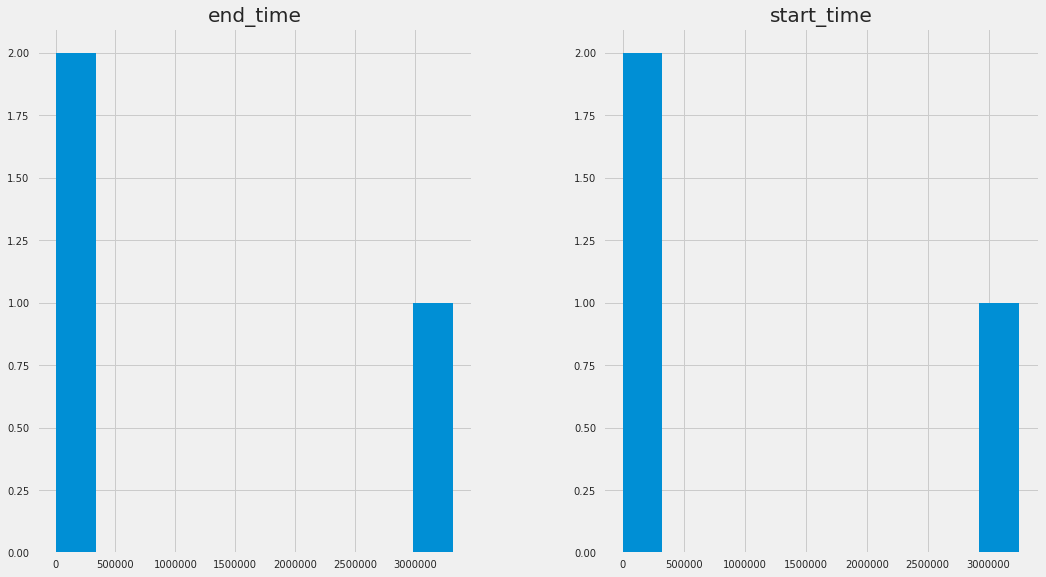

In [139]:
df.groupby('story_id').hist()

In [54]:
def extracting_story_time(start_scene,end_scene,story_id):
    start_story=[]
    end_story=[]
    id_story=[]
    tmp=0
    st_pt=0
    for i in range(len(end_scene)-1):
        if (story_id[i]==story_id[i+1] ):
            tmp=end_scene[i]
        else:
            start_story.append(start_scene[st_pt])
            st_pt=i+1
            if(end_scene[i]!='NA'):
                tmp=end_scene[i]
            end_story.append(tmp)
            id_story.append(story_id[i])
            tmp=0
    return start_story,end_story,id_story
    

In [55]:
x1,x2,x3=extracting_story_time(df.start_time,df.end_time,df.story_id)

In [202]:
df_story_time=pd.DataFrame(columns=('st_st_t','st_ed_t','st_id'))

In [203]:
df_story_time.st_st_t=x1
df_story_time.st_ed_t=x2
df_story_time.st_id=x3

In [204]:
df_story_time=df_story_time.sort_values(['st_id'],ascending=True)

In [210]:
df_story_time=df_story_time.reset_index(drop=True)

In [211]:
df_story_time

,st_st_t,st_ed_t,st_id
0,292127.0,668490.0,0
1,907972.0,1126880.0,0
2,1720960.0,1912610.0,0
3,2057560.0,2297920.0,0
4,106809.0,292127.0,1
5,1474840.0,1520840.0,1
6,1912610.0,2025280.0,1
7,2297920.0,2530800.0,1
8,668490.0,907972.0,2
9,1126880.0,1275530.0,2


In [72]:
def to_min_sec(st_ms,end_ms):
    Ssec=st_ms/1000
    Esec=end_ms/1000
    sm,ss=divmod(Ssec,60)
    em,es=divmod(Esec,60)
    return sm,ss,em,es

In [89]:
m,s,em,es=to_min_sec(df_story_time.st_st_t[13],df_story_time.st_ed_t[13])

In [90]:
m,s,em,es

(38.0, 17.920000000000073, 42.0, 10.800000000000182)

In [93]:
part_stor1 = subs.slice(starts_after={'minutes': 1, 'seconds':48}, ends_before={'minutes': 4, 'seconds': 52})

In [94]:
print(part_stor1.text)

- Easy, boy.
- (Grunts)
(Horse whinnies)
(Man) What do you expect?
They're savages.
One lot steals a goat from another lot,
before you know it
they're ripping each other to pieces.
I've never seen wildlings do a thing like this.
I never seen a thing like this,
not ever in my life.
- (Horse snorts)
- How close did you get?
- Close as any man would.
- We should head back to the Wall.
Do the dead frighten you?
Our orders were to track the wildlings.
We tracked them.
They wonât trouble us no more.
You donât think he'll ask us how they died?
Get back on your horse.
(Sighs, mutters)
Whatever did it to them
could do it to us.
They even killed the children.
It's a good thing we're not children.
You want to run away south,
run away.
Of course,
they will behead you as a deserter.
If I don't catch you ï¬rst.
Get back on your horse.
I won't say it again.
(Shrill animal ll)
Your dead men seem
to have moved mp.
They were here.
See where they went.


In [95]:
part_stor12 = subs.slice(starts_after={'minutes': 28, 'seconds':41}, ends_before={'minutes': 31, 'seconds': 53})

In [99]:
print(part_stor12.text)

now help me keep the damn thing.
We were meant to rule together.
If your sister had lived,
we'd have been bound by blood.
Well, it's not too late.
I have a son,
you have a daughter.
We'll join our houses.
(Woman moaning)
(Sighs)
(Cup falls)
It is true what they say
about the northern girls.
(Giggles)
Did you hear the king's in Winterfell?
I did hear something about that.
And the queen and her twin brother.
They say that he is the most handsome man
in the Seven Kingdoms.
And the other brother?
- The queen has two brothers?
- There's the pretty one...
and there's the clever one.

I hear they II him the Imp.
I hear he hates that nickname.
Oh? I hear he's more than earned it.
I hear he's a drunken little Iecher,
prone to all manner of perversions.
Clever girl.
We've been expecting you, Lord Tyrion.
Have you?
- Already?
- Ohl
- The gods gave me one blessing.
- (Laughs)
(Door opens)
- Don't get up.
- My lord.
Should I explain to you the meaning of
a closed door in a whorehouse, brother?
You 

In [109]:
part_story13 = subs.slice(starts_after={'minutes': 38.0, 'seconds':18}, ends_before={'minutes': 42, 'seconds': 11})

In [101]:
print(part_story13.text)

Why would he say no?
He'd be the second most powerful man
in the kingdoms.
He'd have to leave home.
He'd have to leave me.
And so would you.
You left your home to come here.
And I'd be queen someday.
Please make Father say yesl
- Sansa...
- Please, pleasel
It's the only thing I ever wanted.
(Music playing, people chattering)
(Laughter)
Fill that upl
Boys, Rodrik come on.
Come onl
Come here, you little beautyl
(Robert laughing)
Is he dead yet?
Uncle Benjen.
(Laughs)
You got bigger.
Rode all day.
Didn't want to leave you alone
with the Lannisters.
Why aren't you at the feast?
Lady Stark thought it might
insult the royal family
to seat a bastard in their midst.
Well, you're always
welcome on the Wall.
No bastard was ever
refused a seat there.
So take me with you
when you go back
- Jon...
- Father will let me if you ask him.
I know he will.
The Wall isn't going anywhere.
I'm ready to swear your oath.
You don't understand
what you'd be giving up.
We have no families.
- None of us will ever 

In [102]:
Story_one=part_stor1+part_stor12+part_story13

In [104]:
print(Story_one.text)

- Easy, boy.
- (Grunts)
(Horse whinnies)
(Man) What do you expect?
They're savages.
One lot steals a goat from another lot,
before you know it
they're ripping each other to pieces.
I've never seen wildlings do a thing like this.
I never seen a thing like this,
not ever in my life.
- (Horse snorts)
- How close did you get?
- Close as any man would.
- We should head back to the Wall.
Do the dead frighten you?
Our orders were to track the wildlings.
We tracked them.
They wonât trouble us no more.
You donât think he'll ask us how they died?
Get back on your horse.
(Sighs, mutters)
Whatever did it to them
could do it to us.
They even killed the children.
It's a good thing we're not children.
You want to run away south,
run away.
Of course,
they will behead you as a deserter.
If I don't catch you ï¬rst.
Get back on your horse.
I won't say it again.
(Shrill animal ll)
Your dead men seem
to have moved mp.
They were here.
See where they went.
now help me keep the damn thing.
We were meant 

In [32]:
subs[0].text

u'(Gate rumbling, chains rattling)'

In [33]:
print subs[0].text

(Gate rumbling, chains rattling)


In [34]:
print subs[10].text
print subs[10].start
print subs[10].end

I never seen a thing like this,
not ever in my life.
00:03:14,080
00:03:16,196


In [37]:
print("start\t end\t story id")
for i in range(10):
    if z[i]=='NA':
        print(x[i]+"\t "+y[i]+"\t "+"story not assigned")
    else:
        print(x[i]+"\t "+y[i]+"\t "+z[i])

start	 end	 story id
0	 6445	 story not assigned
6445	 106809	 story not assigned
106809	 212527	 1
212527	 292127	 1
292127	 389609	 0
389609	 522490	 0
522490	 668490	 0
668490	 770727	 2
770727	 907972	 2
907972	 1.12688e+06	 0


In [223]:
def story_texts(start,end,story_id,file_name):
    text_file=open('story_file','w')
    #index = np.array([0, 1, 2, 3, 4])
    #Episode1_stories=pd.DataFrame(columns=(['story_text','story_id']),index=index)
    subs=pysrt.open(file_sub,encoding='iso-8859-1')
    part_st=""
    for i in range(len(start)-1):
        m,s,em,es=to_min_sec(start[i],end[i])
        if (story_id[i]==story_id[i+1]):
            part_st=part_st + subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es}).text.encode('utf-8')
        else:
            part_st=part_st + subs.slice(starts_after={'minutes': m, 'seconds':s}, ends_before={'minutes': em, 'seconds': es}).text.encode('utf-8')
            text_file.write(part_st)
            text_file.write("\n------------------------------------------------------------------------\n")
            part_st=""

In [224]:
f='/people/berhe/Bureau/Project/TLP_thesis/subtitles/GameOfThrones.Season01.Episode01.en.srt'
story_texts(df_story_time.st_st_t,df_story_time.st_ed_t,df_story_time.st_id,f)

In [193]:
def trial(start,end,story_id,file_name):
    for i in range(len(start)-1):
        if (story_id[i]==story_id[i+1]):
            continue
        else:
            print story_id[i]

In [212]:
trial(df_story_time.st_st_t,df_story_time.st_ed_t,df_story_time.st_id,f)

0
1
2
3


In [213]:
df_story_time.st_id

0      0
1      0
2      0
3      0
4      1
5      1
6      1
7      1
8      2
9      2
10     2
11     2
12     3
13     3
14    NA
Name: st_id, dtype: object

In [165]:
y

2      292127.0
4      907972.0
9     1720960.0
12    2057560.0
1      106809.0
7     1474840.0
10    1912610.0
13    2297920.0
3      668490.0
5     1126880.0
8     1520840.0
11    2025280.0
6     1275530.0
14    2530800.0
0           0.0
Name: st_st_t, dtype: float64

In [158]:
len(df_story_time.st_st_t),df_story_time.st_id

(15, 2      0
 4      0
 9      0
 12     0
 1      1
 7      1
 10     1
 13     1
 3      2
 5      2
 8      2
 11     2
 6      3
 14     3
 0     NA
 Name: st_id, dtype: object)

SyntaxError: invalid syntax (<ipython-input-218-35c0e23180a0>, line 1)